Fetching 10257 bars for ADAUSDT on timeframe 4h until 2025-09-06T23:18:11.242643...
Loaded 10257 bars from 0 to 10256



,Total P&L,Max Drawdown,Total Trades,Percent Profitable,Profit Factor,Expectancy
Overview performance,623.59%,-20.10%,141,43.97%,2.31,0.0761


,Total Trades,Number of Winning Trades,Number of Losing Trades,Average Trade (%),Average Win (%),Average Loss (%),Largest Win (%),Largest Loss (%)
Trades analysis,141,62,79,3.21%,12.30%,-3.93%,111.35%,-11.21%


,Sharpe Ratio,Sortino Ratio,Calmar Ratio,Profit Factor
Risk/performance ratios,1.60,5.76,2.66,2.31


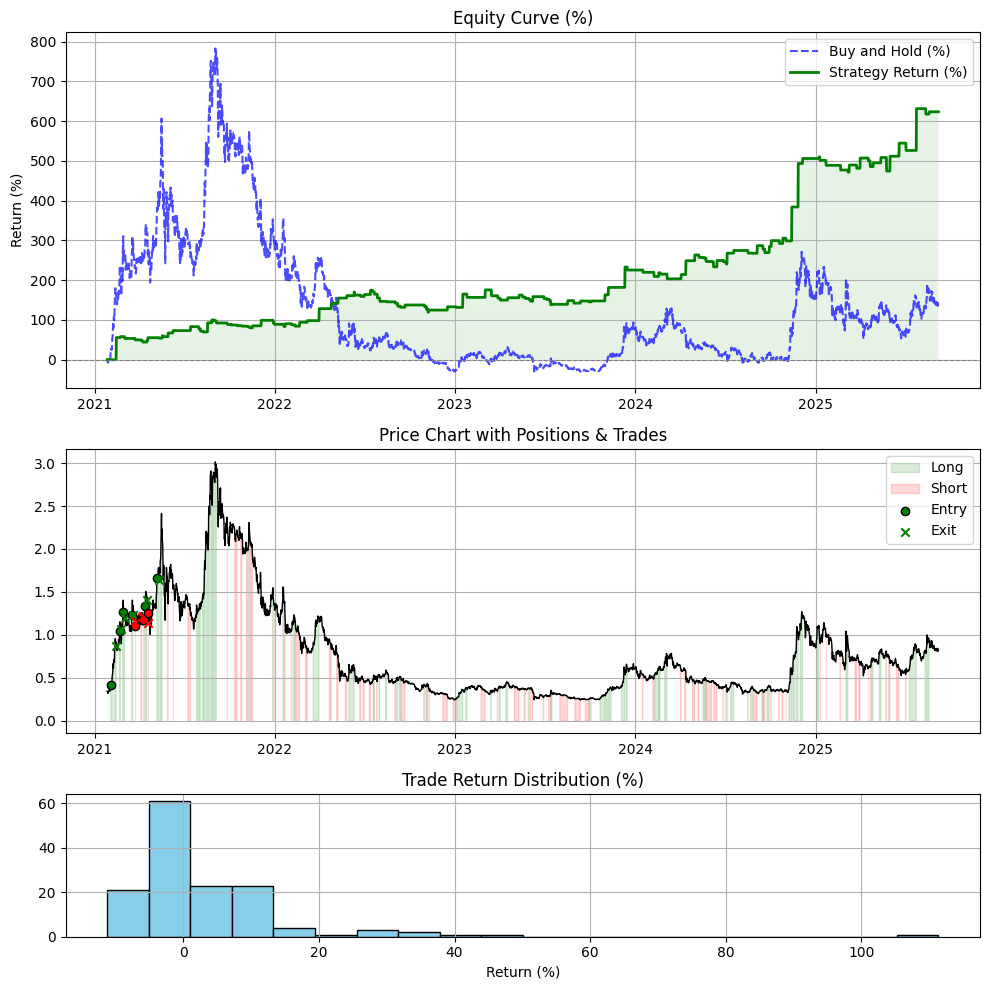

,timestamp,signal,close,reason
10247,2025-09-05 08:00:00+08:00,,0.817900,
10248,2025-09-05 12:00:00+08:00,,0.830200,
10249,2025-09-05 16:00:00+08:00,,0.831800,
10250,2025-09-05 20:00:00+08:00,,0.824800,
10251,2025-09-06 00:00:00+08:00,,0.836100,
10252,2025-09-06 04:00:00+08:00,,0.830700,
10253,2025-09-06 08:00:00+08:00,,0.833800,
10254,2025-09-06 12:00:00+08:00,,0.825600,
10255,2025-09-06 16:00:00+08:00,,0.823300,
10256,2025-09-06 20:00:00+08:00,,0.827400,


In [1]:
import warnings 
warnings.filterwarnings('ignore')
from Technicalindicatorstrategy import vegas,turtle_strategy,macd,turtle_strategy_filter,bbrank,TurtleMACDTimeZoneFilter,strategy_signals
from Backtest.backtest import backtest_signals
from Plot.plot import display_trades_log_as_html,plot_backtest_result
from IPython.display import HTML
import pandas as pd
from datetime import datetime,timedelta
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
np.random.seed(42)  # ✅ 固定隨機性（可重現性）
import random
random.seed(42)

df_signals = strategy_signals.get_signals('ADAUSDT','4h',datetime.now(),10257)
#df_signals = TurtleMACDTimeZoneFilter.get_signals('ETHUSDT','2h',datetime.now(),7309,atr_period=14,fast_period=14,slow_period=25,signal_period=15,high_low_lookback=22,atr_multiplier_sl=2.9)

result = backtest_signals(
    df_signals.copy(),
    initial_capital = 100, # 1000台幣
    fee_rate = 0.002, # 合約手續費
    leverage = 1, # 槓桿
    allow_short = True, # 是否做空
    stop_loss = None,       # 停損閾值，例如0.05代表5%
    take_profit = None,     # 停利閾值
    capital_ratio = 0.5, # 每次使用的資金佔比
    max_hold_bars = 100000,# 最大持有K棒數
    delay_entry=False,
    risk_free_rate=0
    )  
display(pd.DataFrame(result['Overview performance'],index=['Overview performance']))
display(pd.DataFrame(result['Trades analysis'],index=['Trades analysis']))
display(pd.DataFrame(result['Risk/performance ratios'],index=['Risk/performance ratios']))
html_output = display_trades_log_as_html(result['trades_log'][-10:])
plot_backtest_result(result)
display(HTML(html_output))
display(df_signals.loc[df_signals['signal']!=0,['timestamp','signal','close',"reason"]].tail(10).style.background_gradient())